In [55]:
import numpy as np
import matplotlib.pylab as plt
import pickle as pkl

import sys, os
sys.path.append(os.pardir) # sys에 parent directory를 설정해서 상위 폴더의 library도 import 가능
from dataset.mnist import load_mnist # 상위폴더의 dataset/mnist.py 내의 load_mnist 함수 import
from PIL import Image # 파이썬 자체의 이미지 처리 라이브러리

In [56]:
# Step_function

def step_function(x):
    return np.array(x > 0, dtype = np.int)

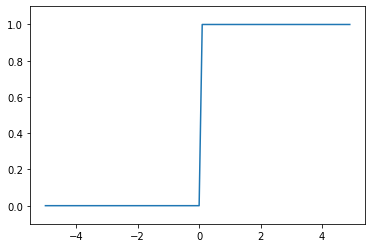

In [57]:
# step graph
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [58]:
# Sigmoid_function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

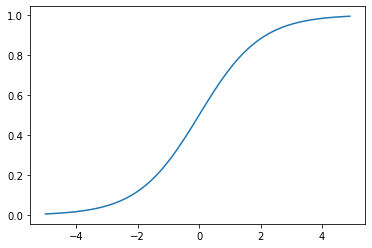

In [59]:
# Sigmoid_graph
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

In [60]:
# Relu function
def relu(x):
    return np.maximum(0, x)

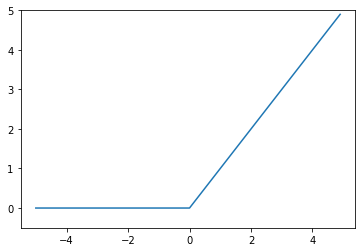

In [61]:
# Relu graph

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.5, 5)
plt.show()

In [62]:
# Identity function
def identity_function(x):
    return x

In [63]:
# Weight initialize

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [64]:
# Forward network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [65]:
# Softmax function

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # for overflow handling
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [66]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

In [67]:
def init_network(): # 초기 가중치는 이미 학습이 완료된 가중치를 가져옴.
    with open("ch03\sample_weight.pkl", 'rb') as f:
        network = pkl.load(f)
    return network

In [68]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [69]:
def img_show(img):
    plt.figure(figsize = (5, 5))
    plt.imshow(img, cmap = 'gray')
    plt.show()

In [70]:
# MNIST 재현하기 with batch -> data load를 한번에 많이 해서 for문을 돌림 : for문 하나에 한개씩 돌리는 것보다빠름 : 500ms
x, t = get_data()
network = init_network()

batch_size = 1000
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    
    accuracy_cnt += np.sum(p == t[i : i + batch_size]) # bool array 생성 후 1만 sum
        
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [71]:
def mean_squared_error(y, t):
    return 0.5*np.sum((y-2)**2)

In [72]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))

In [83]:
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    delta = 1e-7
    
    return -np.sum(t * np.log(y + delta))/batch_size # 정답이 아닌 건 onehot_encoding에서 0과 곱해져서 사라짐

In [84]:
def cross_entropy_error(y, t): # one-hot encoding 아닌경우
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    delta = 1e-7
    
    return -np.sum(np.log(y[np.arange(batch_size), t] + delta))/batch_size # y[0, 2] 등 정답에 해당하는 값만 log로 넘겨서 계산하게 함(list trick)

In [97]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [98]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

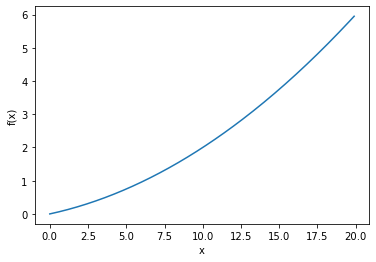

In [99]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [100]:
numerical_diff(function_1, 5)

0.1999999999990898

In [105]:
def function_1_diff(x):
    return numerical_diff(function_1, 5)*x

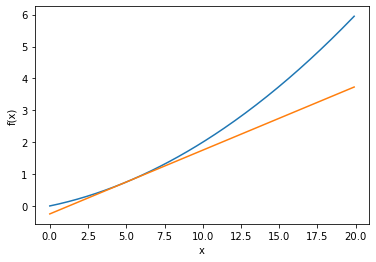

In [116]:
x = np.arange(0.0, 20.0, 0.1)
y1 = function_1(x)
y2 = function_1_diff(x) + (function_1(5) - function_1_diff(5))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [135]:
def function_2(x):
    return np.sum(x**2)

In [136]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        fxh1 = f(x[idx] + h)
        fxh2 = f(x[idx] - h)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
    
    return grad

In [137]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
        
    return x

In [138]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])